Found 3467 images belonging to 3 classes.
Found 865 images belonging to 3 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 1244s 11s/step - accuracy: 0.7027 - loss: 0.7986 - val_accuracy: 0.8197 - val_loss: 0.3543
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 27s 249ms/step - accuracy: 0.9265 - loss: 0.1950 - val_accuracy: 0.9827 - val_loss: 0.0879
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 39s 227ms/step - accuracy: 0.9600 - loss: 0.1076 - val_accuracy: 0.9665 - val_loss: 0.0837
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 238ms/step - accuracy: 0.9822 - loss: 0.0600 - val_accuracy: 0.9931 - val_loss: 0.0415
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - accuracy: 0.9904 - loss: 0.0374 - val_accuracy: 0.9988 - val_loss: 0.0158
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 230ms/step - accuracy: 0.9942 - loss: 0.0228 - val_accuracy: 0.9988 - val_loss: 0.0114
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 238ms/step - accuracy: 0.9960 - loss: 0.0183 - val_accuracy: 0.9988 - val_loss: 0.0113
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 234ms/step - accuracy: 0.9962 - loss: 0

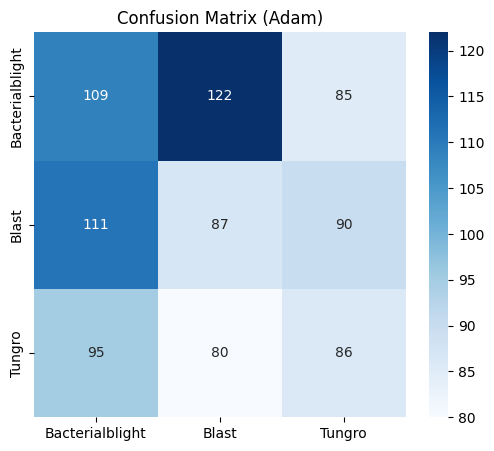

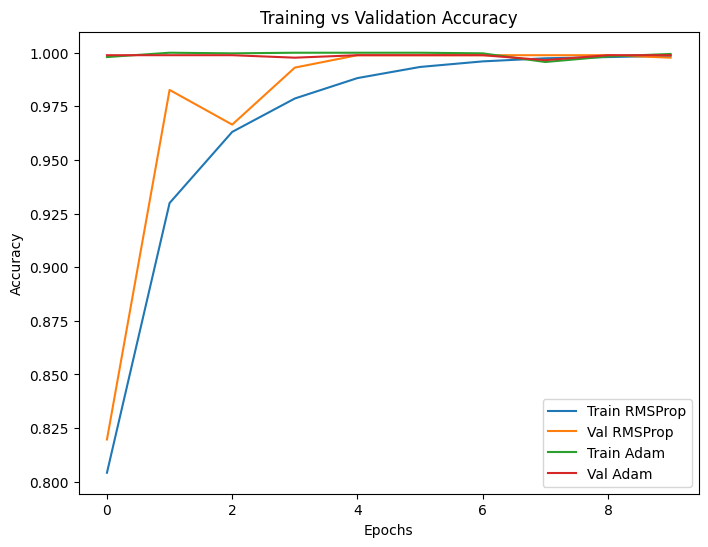

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

data_dir = "/content/drive/MyDrive/rice2"

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(3, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_rms = model.fit(train_gen,
                        validation_data=val_gen,
                        epochs=10)


model.compile(optimizer=Adam(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history_adam = model.fit(train_gen,
                         validation_data=val_gen,
                         epochs=10)


val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

print("Classification Report (Adam):")
print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys())
plt.title("Confusion Matrix (Adam)")
plt.show()


def plot_history(history, label):
    plt.plot(history.history['accuracy'], label=f'Train {label}')
    plt.plot(history.history['val_accuracy'], label=f'Val {label}')

plt.figure(figsize=(8,6))
plot_history(history_rms, "RMSProp")
plot_history(history_adam, "Adam")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


Found 3467 images belonging to 3 classes.
Found 865 images belonging to 3 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 34s 292ms/step - accuracy: 0.7072 - loss: 0.7841 - val_accuracy: 0.9225 - val_loss: 0.2210
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 239ms/step - accuracy: 0.9135 - loss: 0.2147 - val_accuracy: 0.9514 - val_loss: 0.1216
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 230ms/step - accuracy: 0.9662 - loss: 0.0945 - val_accuracy: 0.9734 - val_loss: 0.0763
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 235ms/step - accuracy: 0.9849 - loss: 0.0518 - val_accuracy: 0.9965 - val_loss: 0.0320
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 235ms/step - accuracy: 0.9913 - loss: 0.0342 - val_accuracy: 0.9919 - val_loss: 0.0349
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 236ms/step - accuracy: 0.9945 - loss: 0.0230 - val_accuracy: 0.9965 - val_loss: 0.0193
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 25s 232ms/step - accuracy: 0.9929 - loss: 0.0190 - val_accuracy: 0.9988 - val_loss: 0.0118
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 26s 242ms/step - accuracy: 0.9988 - loss: 0

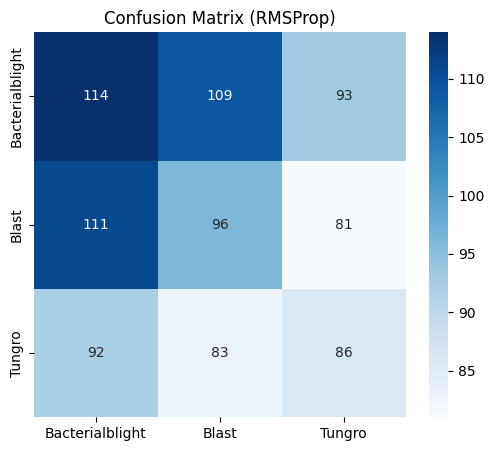

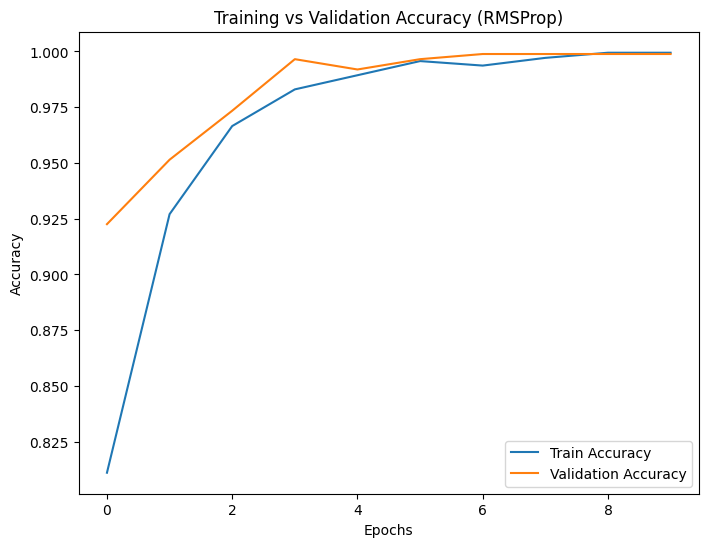

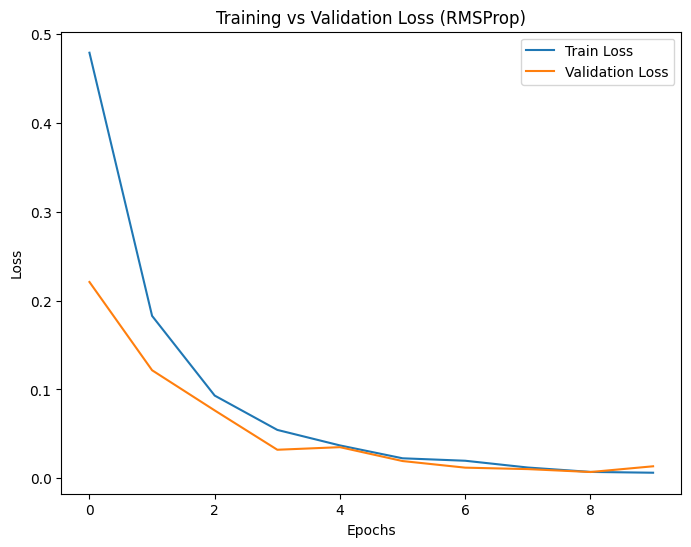

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import RMSprop


data_dir = "/content/drive/MyDrive/rice2"

img_size = (224, 224)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)


base_model = VGG16(weights="imagenet", include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(3, activation="softmax")(x)
model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

history = model.fit(train_gen,
                    validation_data=val_gen,
                    epochs=10)


val_gen.reset()
preds = model.predict(val_gen)
y_pred = np.argmax(preds, axis=1)
y_true = val_gen.classes

print("Classification Report (RMSProp):")
print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=val_gen.class_indices.keys(),
            yticklabels=val_gen.class_indices.keys())
plt.title("Confusion Matrix (RMSProp)")
plt.show()


plt.figure(figsize=(8,6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training vs Validation Accuracy (RMSProp)")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss (RMSProp)")
plt.show()
